# Exploring the Titanic Dataset

Exploratory analysis using the Titanic dataset.

Read more about the titanic dataset here: https://www.kaggle.com/c/titanic

In [1]:
import os #for establishing working directory
import pandas as pd

path = 'C://Users//hussainsarfraz//0_Oxford_Course'
os. chdir(path) #path would be the new working directory
os. getcwd() #getting current working directory
titanic_df = pd.read_csv("1.6_excel_titanic-dataset.csv")

# Data Exploration

Have a look at the dataset. These should be the variables in it:
    
    * survival: Survival (0 = No; 1 = Yes)
    * pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    * name: Name
    * sex: Sex
    * age: Age
    * sibsp: Number of Siblings/Spouses Aboard
    * parch: Number of Parents/Children Aboard
    * ticket: Ticket Number
    * fare: Passenger Fare
    * cabin: Cabin
    * embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
        
**pclass**: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.

### Excercise 1: Data cleanup

Identify quantitative, categorical and ordinal variables.

Identify if there are columns with missing values and decide how to deal with them.

You could either remove the column, or replace the missing values with a sensible **robust** estimate

Identify quantitative, categorical, and ordinal variables
* **quantitative (numerical, discrete or continuous)**: PasswngerId, Age, SibSp, Parch, Fare
* **categorical (groups, ordinal or nominal)**: Survived, Sex, Embarked
* **ordinal variables (groups with order)**: Pclass

In [2]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.0,0,0,A/5 3540,8.050,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.500,NaN,S
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.225,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.050,NaN,S
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.050,NaN,S


In [3]:
print('Survived column unique values:', titanic_df.Survived.unique(), '\n',
     'Pclass column unique values:', titanic_df.Pclass.unique(), '\n',
     'SibSp column unique values:', titanic_df.SibSp.unique(), '\n',
     'Embarked column unique values:', titanic_df.Embarked.unique())

Survived column unique values: [0 1] 
 Pclass column unique values: [3 1 2] 
 SibSp column unique values: [1 0 3 4 2 5 8] 
 Embarked column unique values: ['S' 'C' 'Q' nan]


Identifying Columns with missing values
* The age and cabin columns have rows with missing values

In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic_df.info()
#total rows/entries: 891
#columns w/ NA/null values: Age,Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Removing the cabin column (age column is not being dropped since it will be needed for analysis)

In [6]:
cleaned_df = titanic_df.drop(['Cabin'], axis=1)
cleaned_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
cleaned_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Exercise 2: How Survival is correlated to other attributes of the dataset ? Find out the correlation coefficient.

You can also draw plots showing the correlation coefficient between variable

In [13]:
ATTRS = ["Survived","Pclass","Age", "SibSp","Parch", "Fare"]
#cleaned_df[ATTRS] #displays the dataframe with the select columns
# scatter matrix
print('correlation matrix')
cleaned_df[ATTRS].corr(method='pearson')

Correlation Matrix


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [22]:
#seeing which variables have a low positive/negative correlation
print('Variables with a low positive correlation', '\n',
      cleaned_df[ATTRS].corr(method='pearson') >= 0.3, '\n',
      '\n',
     'Variables with a low negative correlation', '\n',
     cleaned_df[ATTRS].corr(method='pearson') <= -0.3)

Variables with a low positive correlation 
           Survived  Pclass    Age  SibSp  Parch   Fare
Survived      True   False  False  False  False  False
Pclass       False    True  False  False  False  False
Age          False   False   True  False  False  False
SibSp        False   False  False   True   True  False
Parch        False   False  False   True   True  False
Fare         False   False  False  False  False   True 
 
 Variables with a low negative correlation 
           Survived  Pclass    Age  SibSp  Parch   Fare
Survived     False    True  False  False  False  False
Pclass        True   False   True  False  False   True
Age          False    True  False   True  False  False
SibSp        False   False   True  False  False  False
Parch        False   False  False  False  False  False
Fare         False    True  False  False  False  False


Matplotlib is building the font cache; this may take a moment.


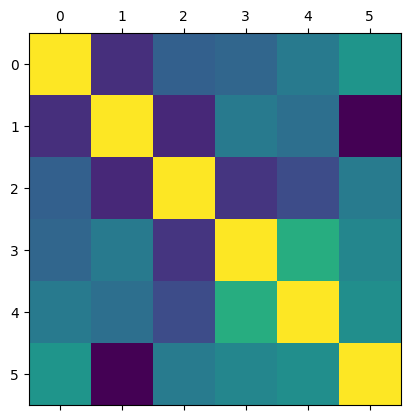

In [17]:
import matplotlib.pyplot as plt

plt.matshow(cleaned_df[ATTRS].corr(), )
plt.show()

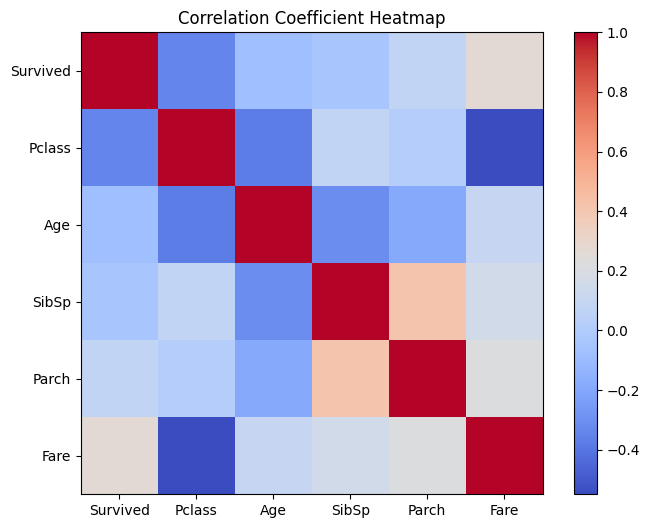

In [18]:
correlation_matrix = cleaned_df[ATTRS].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Customize the plot
plt.xticks(range(len(correlation_matrix)), ATTRS)
plt.yticks(range(len(correlation_matrix)), ATTRS)
plt.title('Correlation Coefficient Heatmap')

# Display the plot
plt.show()

## Exercise 3: Did Sex play a role in Survival?

Advanced: you could also make sure that there are no other factors (e.g. age) confounding the impact of sex in survival.

For instance if a greater share of women than men were very old and their survival rate were lower this may be due to age factors rather than to sex.

In [23]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# create new column ismale - convert 'male' to a number for analysis
titanic_df['IsMale'] = 0
titanic_df.loc[titanic_df['Sex']=='male','IsMale'] = 1 #replacing row values

#new column for IsAdult - simple binary choice of adult (1) and child (0) + None (where age is NaN)
titanic_df['IsAdult'] = None
titanic_df.loc[titanic_df['Age']>=18,'IsAdult'] = 1     #adult
titanic_df.loc[titanic_df['Age']<18,'IsAdult'] = 0     #child

In [42]:
# Printing mean of males in each age group category
print("short hand:")
print( titanic_df.groupby(['IsAdult','IsMale']).mean(numeric_only =True)['Survived']*100)

short hand:
IsAdult  IsMale
0        0         69.090909
         1         39.655172
1        0         77.184466
         1         17.721519
Name: Survived, dtype: float64


In [44]:
# Re-creating the columns with labels

# adding labels to the isadult column since we don't need to calculate the mean in this column
titanic_df['IsAdult'] = "NONE"
titanic_df.loc[titanic_df['Age']>=18,'IsAdult'] = "Adult"     #adult
titanic_df.loc[titanic_df['Age']<18,'IsAdult'] = "Child"     #child

titanic_df.groupby(['IsAdult','Sex']).mean(numeric_only =True)['Survived']*100

IsAdult  Sex   
Adult    female    77.184466
         male      17.721519
Child    female    69.090909
         male      39.655172
NONE     female    67.924528
         male      12.903226
Name: Survived, dtype: float64

([<matplotlib.patches.Wedge at 0x29cf1485b10>,
 [Text(-0.4648801634046089, 0.9969385305388213, 'Girls (<18)'),
  Text(0.46488001287107356, -0.9969386007337617, 'Boys (<18)')])

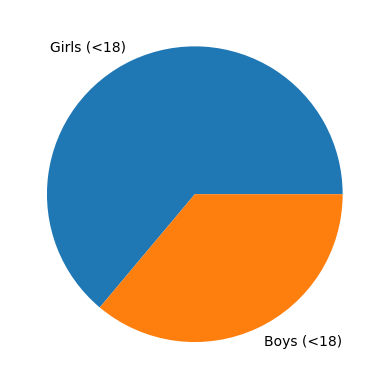

In [47]:
#creating a pie chart
labels = 'Girls (<18)', 'Boys (<18)'
sizes = [69, 39] #manually filled values from calculations above

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

([<matplotlib.patches.Wedge at 0x29cf1517f50>,
 [Text(-0.927181596491431, 0.5918904350702092, 'Women (>=18)'),
  Text(0.9271817893537655, -0.5918901329560662, 'Men (>=18)')])

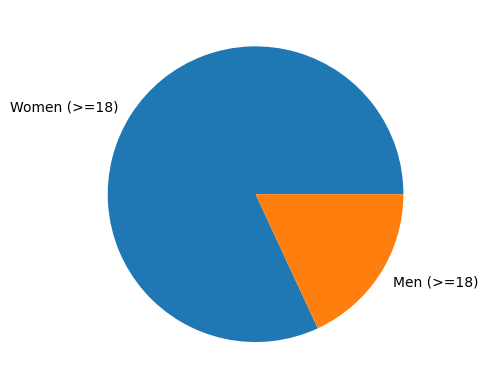

In [48]:
labels = 'Women (>=18)', 'Men (>=18)'
sizes = [77, 17]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [50]:
# LONG HAND (approach 2)

# new column for ismale - convert 'male' to a number for analysis
titanic_df['IsMale'] = 0
titanic_df.loc[titanic_df['Sex']=='male','IsMale'] = 1

#new column for IsAdult - simple binary choice of adult (1) and child (0) + None (where age is NaN)
#the sex column is the one that must be numerate, not this column
titanic_df['IsAdult'] = None
titanic_df.loc[titanic_df['Age']>=18,'IsAdult'] = 1     #adult
titanic_df.loc[titanic_df['Age']<18,'IsAdult'] = 0     #child

#extract the columns we need
cropped = titanic_df[['IsAdult','IsMale','Survived']]

# work out total population for each category
#isAdult col == 0 (child)     #isMale col == 0 (female)
girls_total = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 0)  ) 
#isAdult col == 0 (child)     #isMale col == 1 (male)
boys_total = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 1)  ) 
#isAdult col == 1 (adult)     #isMale col == 0 (female)
women_total = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 0)  ) 
#isAdult col == 1 (adult)     #isMale col == 1 (male)
men_total = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 1)  ) 

# work out total of those who survived for each category
#isAdult col == 0 (child)  #isMale col == 0 (female)   #Survived col == 1
girl_sur = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 0) & (cropped.iloc[:,2] == 1) )
#isAdult col == 0 (child)  #isMale col == 1 (male)   #Survived col == 1
boys_sur = sum(  (cropped.iloc[:,0] == 0) & (cropped.iloc[:,1] == 1) & (cropped.iloc[:,2] == 1) )
#isAdult col == 1 (adult)  #isMale col == 0 (female)   #Survived col == 1
women_sur = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 0) & (cropped.iloc[:,2] == 1) )
#isAdult col == 1 (adult)  #isMale col == 1 (male)   #Survived col == 1
men_sur = sum(  (cropped.iloc[:,0] == 1) & (cropped.iloc[:,1] == 1) & (cropped.iloc[:,2] == 1) )

print()
print("long hand:")

print("boys:", boys_total, "survived:", boys_sur, ", percentage: ", int( (boys_sur/boys_total)*100),"%" )
print("girls:",girls_total,"survived:", girl_sur, ", percentage: ", int( (girl_sur/girls_total)*100),"%" )
print("men:", men_total, "survived:", men_sur, ", percentage: ", int( (men_sur/men_total)*100),"%" )
print("women", women_total, ",survived:", women_sur, ", percentage: ", int( (women_sur/women_total)*100),"%"  )


long hand:
boys: 58 survived: 23 , percentage:  39 %
girls: 55 survived: 38 , percentage:  69 %
men: 395 survived: 70 , percentage:  17 %
women 206 ,survived: 159 , percentage:  77 %


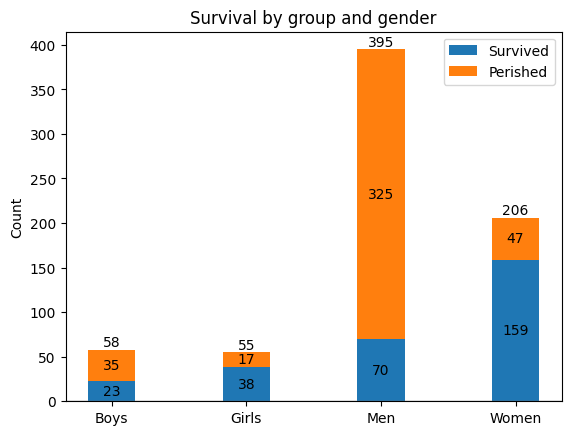

In [63]:
import matplotlib.pyplot as plt
import numpy as np

N = 4

survived = (boys_sur, girl_sur, men_sur, women_sur )
perished = (boys_total-boys_sur, girls_total-girl_sur, men_total-men_sur, women_total-women_sur )


ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

p1 = ax.bar(ind, survived, width, label='Survived')

p2 = ax.bar(ind, perished, width,
            bottom=survived, label='Perished')

ax.axhline(0, color='grey', linewidth=1)
ax.set_ylabel('Count')
ax.set_title('Survival by group and gender')

ax.set_xticks(ind, labels=['Boys', 'Girls', 'Men', 'Women'])
ax.legend()

# Label with label_type 'center' instead of the default 'edge'
ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()

## Exercise 4: Did class played role in survival ?

In [57]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMale,IsAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [65]:
titanic_df.groupby(['Pclass', 'Sex']).mean(numeric_only =True)['Survived']*100
#print( titanic_df.groupby(['IsAdult','IsMale']).mean(numeric_only =True)['Survived']*100)

Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64

## Exercise 5: Did being alone onboard play a role in survival ?

Think of how you can extract the alone variable from the existing ones.

In [81]:
titanic_df['IsAlone'] = 'Alone'

#determining which families are not alone
titanic_df.loc[(titanic_df['SibSp'] != 0) | (titanic_df['Parch'] != 0),
               'IsAlone'] = 'Not alone'  #alone
print('>>Mean of Alone and Not Alone survivors', '\n', '---------', '\n',
      titanic_df.groupby('IsAlone').mean(numeric_only = True)['Survived']*100, '\n', '\n',
     '>>Total number of survivors', '\n', '----------', '\n',
     titanic_df.groupby('IsAlone').sum()['Survived'])

>>Mean of Alone and Not Alone survivors 
 --------- 
 IsAlone
Alone        30.353818
Not alone    50.564972
Name: Survived, dtype: float64 
 
 >>Total number of survivors 
 ---------- 
 IsAlone
Alone        163
Not alone    179
Name: Survived, dtype: int64


In [72]:
#counting the total people alone and not alone
print('Total people alone: ', titanic_df["IsAlone"].value_counts().get('Alone', 0), '\n',
      'Total people not alone', titanic_df["IsAlone"].value_counts().get('Not alone', 0))

Total people alone:  537 
 Total people not alone 354
